# Energy Consumption
In this notebook we will explore energy consumption data, to see if it is useful for our data challenge.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

print('Pandas version:', pd.__version__) # 2.2.3
print('Numpy version:', np.__version__) # 1.26.4
print('Seaborn version:', sns.__version__) # 0.13.2

Pandas version: 2.2.3
Numpy version: 1.26.4
Seaborn version: 0.13.2


## Load the dataset
We will start with loading the consumption data. The dataset was downloaded from https://www.cbs.nl/nl-nl/cijfers/detail/84575NED?q=energie%20verbruik and contains both energy production and consumption data for the Netherlands from January 2021 and December 2023. To extend the dataset with future data it would have to be redownloaded when the new data is made available.

In [2]:
df = pd.read_csv('./data/ConsumptionData/Elektriciteitsbalans__aanbod_en_verbruik_01112024_141147.csv', skiprows=3, sep=';')
df.head()

,Onderwerp,Unnamed: 1,2021 januari,2021 februari,2021 maart,2021 april,2021 mei,2021 juni,2021 juli,2021 augustus,2021 september,2021 oktober,2021 november,2021 december,2022 januari**,2022 februari**,2022 maart**,2022 april**,2022 mei**,2022 juni**,2022 juli**,2022 augustus**,2022 september**,2022 oktober**,2022 november**,2022 december**,2023 januari**,2023 februari**,2023 maart**,2023 april**,2023 mei**,2023 juni**,2023 juli**,2023 augustus**,2023 september**,2023 oktober**,2023 november**,2023 december**
0,Bruto productie,mln kWh,11647.0,10907.0,11626.0,9784.0,9241.0,8847.0,9921.0,8839.0,9065.0,9799.0,10876.0,11415.0,11155.0,9696.0,10951.0,9366.0,9419.0,10600.0,10367.0,10408.0,9721.0,9764.0,9290.0,11072.0,10421.0,10027.0,10885.0,9784.0,9909.0,10306.0,10040.0,10210.0,9652.0,9754.0,9770.0,10655.0
1,Eigen verbruik bij elektr.productie,mln kWh,345.0,296.0,322.0,288.0,274.0,216.0,331.0,326.0,315.0,356.0,367.0,370.0,369.0,310.0,353.0,266.0,266.0,321.0,323.0,320.0,329.0,293.0,302.0,347.0,319.0,315.0,292.0,271.0,245.0,197.0,208.0,264.0,276.0,302.0,254.0,258.0
2,"Netto productie|Netto productie, totaal",mln kWh,11303.0,10610.0,11303.0,9496.0,8967.0,8631.0,9589.0,8513.0,8750.0,9443.0,10508.0,11045.0,10785.0,9386.0,10599.0,9100.0,9154.0,10280.0,10044.0,10088.0,9392.0,9471.0,8987.0,10725.0,10102.0,9712.0,10593.0,9513.0,9664.0,10109.0,9832.0,9947.0,9376.0,9452.0,9517.0,10396.0
3,Netto productie|Kernenergie,mln kWh,358.0,321.0,360.0,333.0,210.0,NaN,329.0,350.0,339.0,314.0,346.0,358.0,361.0,326.0,351.0,103.0,356.0,341.0,347.0,345.0,338.0,355.0,346.0,361.0,361.0,326.0,346.0,NaN,347.0,341.0,350.0,350.0,338.0,355.0,348.0,303.0
4,"Netto productie|Brandstoffen|Brandstoffen, totaal",mln kWh,8897.0,7948.0,8412.0,6410.0,5918.0,6143.0,6600.0,5324.0,6317.0,6230.0,8223.0,8336.0,7838.0,5332.0,7278.0,5222.0,5094.0,6323.0,6096.0,6443.0,6141.0,6024.0,5415.0,7789.0,6199.0,6592.0,6190.0,5422.0,4669.0,4650.0,4281.0,5508.0,5480.0,4928.0,5061.0,5727.0


## Data Cleaning

The dataset needs some formatting to make it more useful, as the dates are in wide format and the type is in long format. We will start with renaming the date columns from written months to numeric months.

In [3]:
def format_months(df):
    month_mapping = {
        "januari": "01",
        "februari": "02",
        "maart": "03",
        "april": "04",
        "mei": "05",
        "juni": "06",
        "juli": "07",
        "augustus": "08",
        "september": "09",
        "oktober": "10",
        "november": "11",
        "december": "12"
    }
    
    new_columns = []
    for col in df.columns:
        clean_col = ''.join(filter(str.isalnum, col)) if any(month in col for month in month_mapping.keys()) else col
        
        for month in month_mapping.keys():
            if month in clean_col:
                year = ''.join(filter(str.isdigit, clean_col.split(month)[0]))
                new_columns.append(f"{month_mapping[month]}-{year}")
                break
        else:
            new_columns.append(col)
    
    df.columns = new_columns
    return df

df = format_months(df)
df


,Onderwerp,Unnamed: 1,01-2021,02-2021,03-2021,04-2021,05-2021,06-2021,07-2021,08-2021,09-2021,10-2021,11-2021,12-2021,01-2022,02-2022,03-2022,04-2022,05-2022,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023,04-2023,05-2023,06-2023,07-2023,08-2023,09-2023,10-2023,11-2023,12-2023
0,Bruto productie,mln kWh,11647.0,10907.0,11626.0,9784.0,9241.0,8847.0,9921.0,8839.0,9065.0,9799.0,10876.0,11415.0,11155.0,9696.0,10951.0,9366.0,9419.0,10600.0,10367.0,10408.0,9721.0,9764.0,9290.0,11072.0,10421.0,10027.0,10885.0,9784.0,9909.0,10306.0,10040.0,10210.0,9652.0,9754.0,9770.0,10655.0
1,Eigen verbruik bij elektr.productie,mln kWh,345.0,296.0,322.0,288.0,274.0,216.0,331.0,326.0,315.0,356.0,367.0,370.0,369.0,310.0,353.0,266.0,266.0,321.0,323.0,320.0,329.0,293.0,302.0,347.0,319.0,315.0,292.0,271.0,245.0,197.0,208.0,264.0,276.0,302.0,254.0,258.0
2,"Netto productie|Netto productie, totaal",mln kWh,11303.0,10610.0,11303.0,9496.0,8967.0,8631.0,9589.0,8513.0,8750.0,9443.0,10508.0,11045.0,10785.0,9386.0,10599.0,9100.0,9154.0,10280.0,10044.0,10088.0,9392.0,9471.0,8987.0,10725.0,10102.0,9712.0,10593.0,9513.0,9664.0,10109.0,9832.0,9947.0,9376.0,9452.0,9517.0,10396.0
3,Netto productie|Kernenergie,mln kWh,358.0,321.0,360.0,333.0,210.0,NaN,329.0,350.0,339.0,314.0,346.0,358.0,361.0,326.0,351.0,103.0,356.0,341.0,347.0,345.0,338.0,355.0,346.0,361.0,361.0,326.0,346.0,NaN,347.0,341.0,350.0,350.0,338.0,355.0,348.0,303.0
4,"Netto productie|Brandstoffen|Brandstoffen, totaal",mln kWh,8897.0,7948.0,8412.0,6410.0,5918.0,6143.0,6600.0,5324.0,6317.0,6230.0,8223.0,8336.0,7838.0,5332.0,7278.0,5222.0,5094.0,6323.0,6096.0,6443.0,6141.0,6024.0,5415.0,7789.0,6199.0,6592.0,6190.0,5422.0,4669.0,4650.0,4281.0,5508.0,5480.0,4928.0,5061.0,5727.0
5,Netto productie|Brandstoffen|Kolen,mln kWh,1596.0,1037.0,1212.0,799.0,714.0,653.0,1491.0,1546.0,1439.0,1982.0,1836.0,2192.0,1704.0,928.0,1533.0,1122.0,594.0,1320.0,1556.0,1597.0,1928.0,1265.0,1236.0,1700.0,1438.0,1484.0,1345.0,1063.0,511.0,192.0,272.0,384.0,467.0,944.0,1051.0,997.0
6,Netto productie|Brandstoffen|Olieproducten,mln kWh,110.0,102.0,99.0,130.0,104.0,85.0,98.0,115.0,118.0,127.0,120.0,99.0,92.0,129.0,141.0,116.0,129.0,154.0,157.0,147.0,133.0,106.0,106.0,144.0,130.0,123.0,95.0,157.0,132.0,96.0,126.0,151.0,132.0,120.0,119.0,109.0
7,Netto productie|Brandstoffen|Aardgas,mln kWh,6113.0,5882.0,6091.0,4557.0,4234.0,4810.0,4015.0,2510.0,3815.0,3178.0,5258.0,5056.0,5042.0,3463.0,4576.0,3394.0,3730.0,3858.0,3363.0,3719.0,3218.0,4038.0,3199.0,5079.0,3783.0,4143.0,4020.0,3370.0,3341.0,4021.0,3438.0,4340.0,4151.0,3150.0,3194.0,3924.0
8,Netto productie|Brandstoffen|Biomassa,mln kWh,936.0,819.0,875.0,789.0,725.0,468.0,843.0,996.0,817.0,825.0,884.0,842.0,864.0,687.0,888.0,463.0,511.0,855.0,881.0,831.0,734.0,488.0,755.0,745.0,725.0,723.0,603.0,709.0,586.0,246.0,339.0,506.0,591.0,570.0,592.0,586.0
9,Netto productie|Brandstoffen|Overige brandstof...,mln kWh,142.0,109.0,135.0,135.0,142.0,127.0,153.0,156.0,129.0,119.0,125.0,146.0,135.0,124.0,140.0,128.0,130.0,135.0,140.0,149.0,128.0,127.0,119.0,121.0,123.0,119.0,128.0,123.0,100.0,95.0,106.0,127.0,139.0,143.0,105.0,110.0


Next we will drop the last row because it does not contain any data, it is only the source.

In [4]:
if df['Onderwerp'].iloc[-1] == 'Bron: CBS':
    df = df.drop(index=df.index[-1])

df.tail(5)

,Onderwerp,Unnamed: 1,01-2021,02-2021,03-2021,04-2021,05-2021,06-2021,07-2021,08-2021,09-2021,10-2021,11-2021,12-2021,01-2022,02-2022,03-2022,04-2022,05-2022,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023,04-2023,05-2023,06-2023,07-2023,08-2023,09-2023,10-2023,11-2023,12-2023
25,Uitvoer|Duitsland,mln kWh,368.0,845.0,1296.0,924.0,913.0,495.0,767.0,284.0,248.0,375.0,527.0,600.0,416.0,406.0,377.0,428.0,783.0,1006.0,751.0,977.0,972.0,1274.0,1019.0,502.0,609.0,560.0,588.0,637.0,1078.0,1226.0,1300.0,1487.0,882.0,765.0,332.0,568.0
26,Uitvoer|Verenigd Koninkrijk,mln kWh,0.0,380.0,204.0,0.0,0.0,377.0,630.0,601.0,536.0,528.0,555.0,621.0,502.0,523.0,607.0,311.0,128.0,183.0,285.0,248.0,163.0,115.0,178.0,444.0,534.0,545.0,633.0,479.0,324.0,286.0,283.0,231.0,124.0,278.0,389.0,249.0
27,Uitvoer|Noorwegen,mln kWh,56.0,0.0,0.0,47.0,71.0,10.0,28.0,47.0,5.0,17.0,6.0,78.0,54.0,33.0,33.0,62.0,10.0,0.0,0.0,0.0,0.0,87.0,11.0,129.0,72.0,6.0,80.0,73.0,60.0,50.0,53.0,25.0,7.0,19.0,42.0,184.0
28,Distributieverliezen,mln kWh,447.0,401.0,412.0,378.0,379.0,371.0,389.0,368.0,378.0,411.0,422.0,440.0,454.0,407.0,418.0,384.0,385.0,377.0,395.0,373.0,384.0,417.0,428.0,447.0,454.0,407.0,418.0,384.0,385.0,377.0,395.0,373.0,384.0,417.0,428.0,447.0
29,Netto verbruik (berekend),mln kWh,10731.0,9611.0,9961.0,8791.0,8963.0,9064.0,9264.0,8969.0,9061.0,9401.0,9721.0,10080.0,10141.0,9113.0,9159.0,8753.0,9013.0,8886.0,9149.0,9019.0,8528.0,8627.0,8841.0,9646.0,9696.0,8567.0,9294.0,8276.0,8525.0,8854.0,8808.0,8556.0,8648.0,9088.0,9474.0,9898.0


In [5]:
if 'Unnamed: 1' in df.columns:
    df['Onderwerp'] = df['Onderwerp'] + ' (' + df['Unnamed: 1'] + ')'
    
    df = df.drop(columns=['Unnamed: 1'])

df

,Onderwerp,01-2021,02-2021,03-2021,04-2021,05-2021,06-2021,07-2021,08-2021,09-2021,10-2021,11-2021,12-2021,01-2022,02-2022,03-2022,04-2022,05-2022,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023,04-2023,05-2023,06-2023,07-2023,08-2023,09-2023,10-2023,11-2023,12-2023
0,Bruto productie (mln kWh),11647.0,10907.0,11626.0,9784.0,9241.0,8847.0,9921.0,8839.0,9065.0,9799.0,10876.0,11415.0,11155.0,9696.0,10951.0,9366.0,9419.0,10600.0,10367.0,10408.0,9721.0,9764.0,9290.0,11072.0,10421.0,10027.0,10885.0,9784.0,9909.0,10306.0,10040.0,10210.0,9652.0,9754.0,9770.0,10655.0
1,Eigen verbruik bij elektr.productie (mln kWh),345.0,296.0,322.0,288.0,274.0,216.0,331.0,326.0,315.0,356.0,367.0,370.0,369.0,310.0,353.0,266.0,266.0,321.0,323.0,320.0,329.0,293.0,302.0,347.0,319.0,315.0,292.0,271.0,245.0,197.0,208.0,264.0,276.0,302.0,254.0,258.0
2,"Netto productie|Netto productie, totaal (mln kWh)",11303.0,10610.0,11303.0,9496.0,8967.0,8631.0,9589.0,8513.0,8750.0,9443.0,10508.0,11045.0,10785.0,9386.0,10599.0,9100.0,9154.0,10280.0,10044.0,10088.0,9392.0,9471.0,8987.0,10725.0,10102.0,9712.0,10593.0,9513.0,9664.0,10109.0,9832.0,9947.0,9376.0,9452.0,9517.0,10396.0
3,Netto productie|Kernenergie (mln kWh),358.0,321.0,360.0,333.0,210.0,NaN,329.0,350.0,339.0,314.0,346.0,358.0,361.0,326.0,351.0,103.0,356.0,341.0,347.0,345.0,338.0,355.0,346.0,361.0,361.0,326.0,346.0,NaN,347.0,341.0,350.0,350.0,338.0,355.0,348.0,303.0
4,"Netto productie|Brandstoffen|Brandstoffen, tot...",8897.0,7948.0,8412.0,6410.0,5918.0,6143.0,6600.0,5324.0,6317.0,6230.0,8223.0,8336.0,7838.0,5332.0,7278.0,5222.0,5094.0,6323.0,6096.0,6443.0,6141.0,6024.0,5415.0,7789.0,6199.0,6592.0,6190.0,5422.0,4669.0,4650.0,4281.0,5508.0,5480.0,4928.0,5061.0,5727.0
5,Netto productie|Brandstoffen|Kolen (mln kWh),1596.0,1037.0,1212.0,799.0,714.0,653.0,1491.0,1546.0,1439.0,1982.0,1836.0,2192.0,1704.0,928.0,1533.0,1122.0,594.0,1320.0,1556.0,1597.0,1928.0,1265.0,1236.0,1700.0,1438.0,1484.0,1345.0,1063.0,511.0,192.0,272.0,384.0,467.0,944.0,1051.0,997.0
6,Netto productie|Brandstoffen|Olieproducten (ml...,110.0,102.0,99.0,130.0,104.0,85.0,98.0,115.0,118.0,127.0,120.0,99.0,92.0,129.0,141.0,116.0,129.0,154.0,157.0,147.0,133.0,106.0,106.0,144.0,130.0,123.0,95.0,157.0,132.0,96.0,126.0,151.0,132.0,120.0,119.0,109.0
7,Netto productie|Brandstoffen|Aardgas (mln kWh),6113.0,5882.0,6091.0,4557.0,4234.0,4810.0,4015.0,2510.0,3815.0,3178.0,5258.0,5056.0,5042.0,3463.0,4576.0,3394.0,3730.0,3858.0,3363.0,3719.0,3218.0,4038.0,3199.0,5079.0,3783.0,4143.0,4020.0,3370.0,3341.0,4021.0,3438.0,4340.0,4151.0,3150.0,3194.0,3924.0
8,Netto productie|Brandstoffen|Biomassa (mln kWh),936.0,819.0,875.0,789.0,725.0,468.0,843.0,996.0,817.0,825.0,884.0,842.0,864.0,687.0,888.0,463.0,511.0,855.0,881.0,831.0,734.0,488.0,755.0,745.0,725.0,723.0,603.0,709.0,586.0,246.0,339.0,506.0,591.0,570.0,592.0,586.0
9,Netto productie|Brandstoffen|Overige brandstof...,142.0,109.0,135.0,135.0,142.0,127.0,153.0,156.0,129.0,119.0,125.0,146.0,135.0,124.0,140.0,128.0,130.0,135.0,140.0,149.0,128.0,127.0,119.0,121.0,123.0,119.0,128.0,123.0,100.0,95.0,106.0,127.0,139.0,143.0,105.0,110.0


Finally we will change the format from wide to long, so we have the dates as rows and the onderwerp as column names.

In [6]:
df_long = pd.melt(df, id_vars=['Onderwerp'], var_name='Date', value_name='Value')

df_long = df_long[df_long['Date'].str.match(r'\d{2}-\d{4}')]

df_long['Date'] = pd.to_datetime(df_long['Date'], format='%m-%Y')

df_pivot = df_long.pivot(index='Date', columns='Onderwerp', values='Value').reset_index()
df_pivot.columns.name = None

In [7]:
df_pivot

,Date,Bruto productie (mln kWh),Distributieverliezen (mln kWh),Eigen verbruik bij elektr.productie (mln kWh),Invoer|België (mln kWh),Invoer|Denemarken (mln kWh),Invoer|Duitsland (mln kWh),"Invoer|Invoer, totaal (mln kWh)",Invoer|Noorwegen (mln kWh),Invoer|Verenigd Koninkrijk (mln kWh),Netto productie|Brandstoffen|Aardgas (mln kWh),Netto productie|Brandstoffen|Biomassa (mln kWh),"Netto productie|Brandstoffen|Brandstoffen, totaal (mln kWh)",Netto productie|Brandstoffen|Kolen (mln kWh),Netto productie|Brandstoffen|Olieproducten (mln kWh),Netto productie|Brandstoffen|Overige brandstoffen (niet-hernieuwbaar) (mln kWh),Netto productie|Kernenergie (mln kWh),"Netto productie|Netto productie, totaal (mln kWh)",Netto productie|Overige bronnen (mln kWh),Netto productie|Waterkracht (mln kWh),Netto productie|Windenergie|Windenergie op land (mln kWh),Netto productie|Windenergie|Windenergie op zee (mln kWh),"Netto productie|Windenergie|Windenergie, totaal (mln kWh)",Netto productie|Zonnestroom (mln kWh),Netto verbruik (berekend) (mln kWh),Uitvoer|België (mln kWh),Uitvoer|Denemarken (mln kWh),Uitvoer|Duitsland (mln kWh),Uitvoer|Noorwegen (mln kWh),"Uitvoer|Uitvoer, totaal (mln kWh)",Uitvoer|Verenigd Koninkrijk (mln kWh)
0,2021-01-01,11647.0,447.0,345.0,184.0,153.0,1075.0,1542.0,130.0,0.0,6113.0,936.0,8897.0,1596.0,110.0,142.0,358.0,11303.0,34.0,7.0,943.0,868.0,1811.0,196.0,10731.0,1146.0,97.0,368.0,56.0,1667.0,0.0
1,2021-02-01,10907.0,401.0,296.0,460.0,180.0,730.0,1378.0,0.0,7.0,5882.0,819.0,7948.0,1037.0,102.0,109.0,321.0,10610.0,38.0,4.0,942.0,913.0,1854.0,444.0,9611.0,600.0,152.0,845.0,0.0,1977.0,380.0
2,2021-03-01,11626.0,412.0,322.0,393.0,242.0,605.0,1269.0,30.0,0.0,6091.0,875.0,8412.0,1212.0,99.0,135.0,360.0,11303.0,42.0,12.0,911.0,731.0,1642.0,835.0,9961.0,595.0,104.0,1296.0,0.0,2199.0,204.0
3,2021-04-01,9784.0,378.0,288.0,253.0,279.0,473.0,1384.0,380.0,0.0,4557.0,789.0,6410.0,799.0,130.0,135.0,333.0,9496.0,42.0,8.0,743.0,628.0,1371.0,1332.0,8791.0,666.0,73.0,924.0,47.0,1711.0,0.0
4,2021-05-01,9241.0,379.0,274.0,833.0,252.0,414.0,1868.0,370.0,0.0,4234.0,725.0,5918.0,714.0,104.0,142.0,210.0,8967.0,41.0,9.0,786.0,519.0,1305.0,1484.0,8963.0,435.0,73.0,913.0,71.0,1492.0,0.0
5,2021-06-01,8847.0,371.0,216.0,690.0,239.0,582.0,1985.0,468.0,7.0,4810.0,468.0,6143.0,653.0,85.0,127.0,NaN,8631.0,24.0,10.0,341.0,313.0,654.0,1801.0,9064.0,202.0,97.0,495.0,10.0,1181.0,377.0
6,2021-07-01,9921.0,389.0,331.0,688.0,96.0,584.0,1770.0,402.0,0.0,4015.0,843.0,6600.0,1491.0,98.0,153.0,329.0,9589.0,41.0,9.0,586.0,447.0,1033.0,1577.0,9264.0,235.0,46.0,767.0,28.0,1707.0,630.0
7,2021-08-01,8839.0,368.0,326.0,711.0,212.0,987.0,2174.0,255.0,9.0,2510.0,996.0,5324.0,1546.0,115.0,156.0,350.0,8513.0,44.0,12.0,764.0,629.0,1393.0,1390.0,8969.0,353.0,66.0,284.0,47.0,1351.0,601.0
8,2021-09-01,9065.0,378.0,315.0,237.0,375.0,1321.0,2165.0,228.0,5.0,3815.0,817.0,6317.0,1439.0,118.0,129.0,339.0,8750.0,37.0,4.0,524.0,399.0,924.0,1129.0,9061.0,660.0,28.0,248.0,5.0,1477.0,536.0
9,2021-10-01,9799.0,411.0,356.0,267.0,358.0,841.0,1938.0,454.0,18.0,3178.0,825.0,6230.0,1982.0,127.0,119.0,314.0,9443.0,45.0,4.0,1288.0,920.0,2208.0,642.0,9401.0,638.0,11.0,375.0,17.0,1569.0,528.0


We will export the cleaned dataframe to a new csv file in case we will need this in another notebook.

In [8]:
file_path = './data/ConsumptionData/cleaned_consumption_data.csv'

df_pivot.to_csv(file_path, index=False)

## Data Analysis

In [9]:
df = df_pivot

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 31 columns):
 #   Column                                                                           Non-Null Count  Dtype         
---  ------                                                                           --------------  -----         
 0   Date                                                                             36 non-null     datetime64[ns]
 1   Bruto productie (mln kWh)                                                        36 non-null     float64       
 2   Distributieverliezen (mln kWh)                                                   36 non-null     float64       
 3   Eigen verbruik bij elektr.productie (mln kWh)                                    36 non-null     float64       
 4   Invoer|België (mln kWh)                                                          36 non-null     float64       
 5   Invoer|Denemarken (mln kWh)                                              

We can see there are no null values in the dataset. The column we are mostly interested in is the `Netto Verbruik (berekend) (mln kWh)`

In [16]:
df_consumption = df.copy()
df_consumption = df_consumption[['Date', 'Netto verbruik (berekend) (mln kWh)']]
df_consumption = df_consumption.rename(columns={'Netto verbruik (berekend) (mln kWh)': 'Consumption'})
df_consumption['Year'] = df_consumption['Date'].dt.year
df_consumption['Month'] = df_consumption['Date'].dt.month

df_consumption = df_consumption[['Year', 'Month'] + [col for col in df_consumption.columns if col not in ['Year', 'Month']]]

df_consumption.sample(5)

,Year,Month,Date,Consumption
35,2023,12,2023-12-01,9898.0
18,2022,7,2022-07-01,9149.0
1,2021,2,2021-02-01,9611.0
16,2022,5,2022-05-01,9013.0
9,2021,10,2021-10-01,9401.0


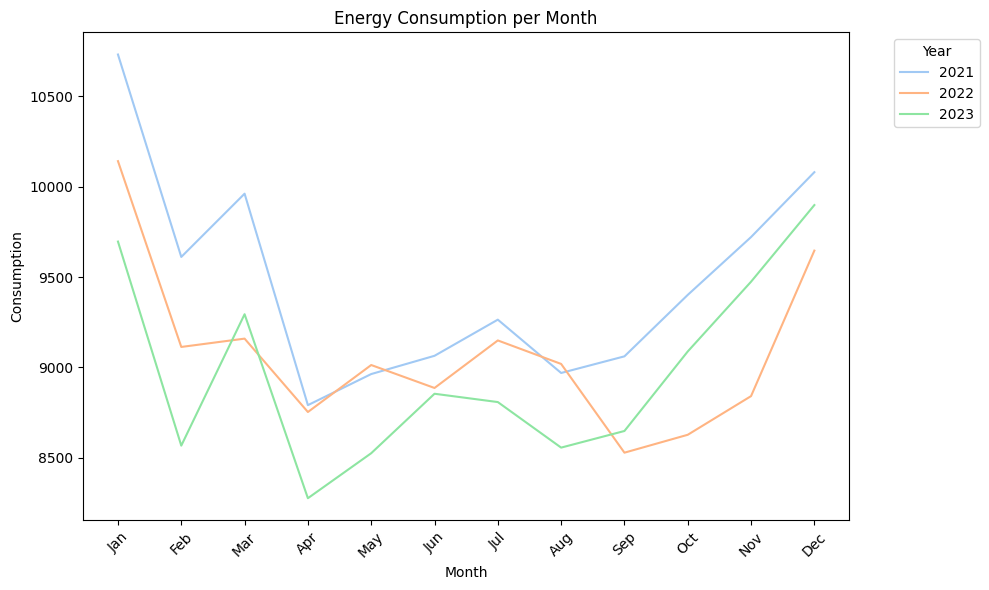

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_consumption['Month'], y=df_consumption['Consumption'], hue=df_consumption['Year'], palette='pastel')

plt.title('Energy Consumption per Month')
plt.xticks(df_consumption['Date'].dt.month.unique(), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


By looking at this graph we can see the consumption for 2021 has been higher than 2022 and 2023. Especially in the winter months the consumption is higher, this is most likely due to the colder weather and people consuming more energy for heating. We have to correlate this to the weather data to see if that explains why the consumption might have been higher in 2021.

# ENERGY CONSUMPTION VS WEATHER ^

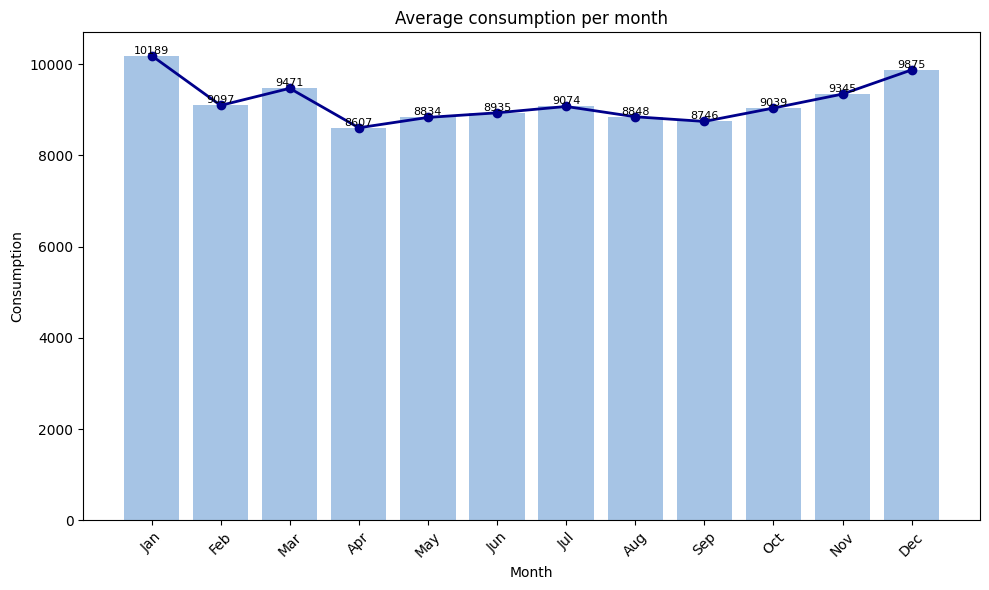

In [24]:
monthly_avg = df_consumption.groupby('Month')['Consumption'].mean()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=monthly_avg.index, y=monthly_avg.values, color='#9cc4ef')

for bar, value in zip(barplot.patches, monthly_avg):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()

    plt.text(
        x=bar_x, 
        y=bar_height, 
        s=f"{value:.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=8, 
        color='black'
    )

plt.plot(
    monthly_avg.index - 1, 
    monthly_avg.values, 
    marker='o', 
    color='darkblue', 
    linewidth=2, 
    label='Trend'
)

plt.xticks(ticks=monthly_avg.index - 1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=45)
plt.title('Average consumption per month')
plt.ylabel('Consumption')

plt.tight_layout()
plt.show()


By looking at this graph that takes the average energy consumption per month for all 3 years we can see there is only a slight difference between the months in the summer and winter.

In [14]:
df_import_export = df.copy()
df_import_export['Invoer'] = df_import_export[['Invoer|België (mln kWh)', 'Invoer|Denemarken (mln kWh)', 
                   'Invoer|Duitsland (mln kWh)', 'Invoer|Noorwegen (mln kWh)', 
                   'Invoer|Verenigd Koninkrijk (mln kWh)']].sum(axis=1)
df_import_export['Uitvoer'] = df_import_export[['Uitvoer|België (mln kWh)', 'Uitvoer|Denemarken (mln kWh)', 
                    'Uitvoer|Duitsland (mln kWh)', 'Uitvoer|Noorwegen (mln kWh)', 
                    'Uitvoer|Verenigd Koninkrijk (mln kWh)']].sum(axis=1)

plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='Date', y='Invoer', label='Invoer')
sns.lineplot(data=df, x='Date', y='Uitvoer', label='Uitvoer')

plt.xticks(df_consumption['Date'])
plt.xticks(rotation=90)

plt.show()


ValueError: Could not interpret value `Invoer` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>